In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding & Analyzing the Dataset

In [19]:
df = pd.read_csv('NVDA_1999-01-01_2024-12-04.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.017325,2714688000
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.019140,510480000
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.017655,343200000
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.017600,244368000
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.017544,227520000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6509 entries, 0 to 6508
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6509 non-null   object 
 1   Open       6509 non-null   float64
 2   High       6509 non-null   float64
 3   Low        6509 non-null   float64
 4   Close      6509 non-null   float64
 5   Adj Close  6509 non-null   float64
 6   Volume     6509 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 356.1+ KB


In [6]:
df.nunique()

,0
Date,6509
Open,4953
High,4928
Low,4915
Close,5068
Adj Close,5466
Volume,6425


In [9]:
df['Volume'].describe()

,Volume
count,6.509000e+03
mean,6.017739e+08
std,4.311185e+08
min,1.968000e+07
25%,3.413160e+08
50%,5.033400e+08
75%,7.326760e+08
max,9.230856e+09


In [5]:
df['Adj Close'].describe()

,Adj Close
count,6509.000000
mean,7.679767
std,21.373121
min,0.014410
25%,0.117953
50%,0.212784
75%,4.219250
max,148.880005


In [6]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Volume'] < Q1 - 1.5 * IQR) | (df['Volume'] > Q3 + 1.5 * IQR)]
print(outliers)

           Date       Open       High        Low      Close  Adj Close  \
0    1999-01-22   0.043750   0.048828   0.038802   0.041016   0.017325   
145  1999-08-19   0.049870   0.059115   0.048177   0.056510   0.023869   
178  1999-10-06   0.044661   0.052083   0.044271   0.049870   0.021065   
198  1999-11-03   0.054167   0.058594   0.053776   0.057161   0.024144   
210  1999-11-19   0.083594   0.092448   0.083333   0.089323   0.037729   
...         ...        ...        ...        ...        ...        ...   
4991 2018-11-20   3.351500   3.856500   3.332750   3.727000   3.469927   
5035 2019-01-28   3.413750   3.541000   3.275000   3.450250   3.244699   
5049 2019-02-15   4.073750   4.096750   3.910500   3.933500   3.699158   
5441 2020-09-04  12.783750  13.175000  11.704750  12.622500  12.513063   
6125 2023-05-25  38.522999  39.480000  36.634998  37.980000  37.980000   

          Volume  
0     2714688000  
145   1966992000  
178   1508736000  
198   2011680000  
210   2165184000

In [7]:
Q1 = df['Adj Close'].quantile(0.25)
Q3 = df['Adj Close'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Adj Close'] < Q1 - 1.5 * IQR) | (df['Adj Close'] > Q3 + 1.5 * IQR)]
print(outliers)

           Date        Open        High         Low       Close   Adj Close  \
5400 2020-07-09   10.380250   10.570000   10.233500   10.509000   10.386729   
5407 2020-07-20   10.274250   10.531250   10.156750   10.510750   10.388459   
5415 2020-07-30   10.375000   10.623000   10.295250   10.614000   10.490509   
5416 2020-07-31   10.563250   10.766500   10.433000   10.614750   10.491249   
5417 2020-08-03   10.732500   11.098750   10.715250   11.010250   10.882148   
...         ...         ...         ...         ...         ...         ...   
6504 2024-11-26  137.699997  139.300003  135.669998  136.919998  136.919998   
6505 2024-11-27  135.009995  137.220001  131.800003  135.339996  135.339996   
6506 2024-11-29  136.779999  139.350006  136.050003  138.250000  138.250000   
6507 2024-12-02  138.830002  140.449997  137.820007  138.630005  138.630005   
6508 2024-12-03  138.259995  140.539993  137.949997  140.259995  140.259995   

         Volume  
5400  494548000  
5407  284852000

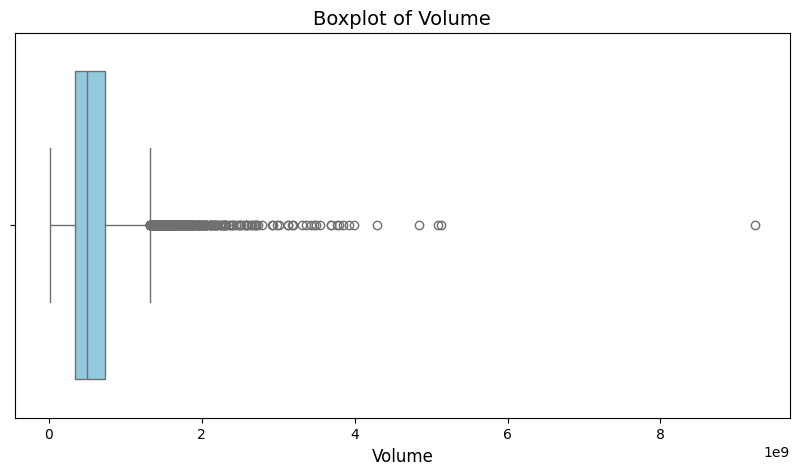

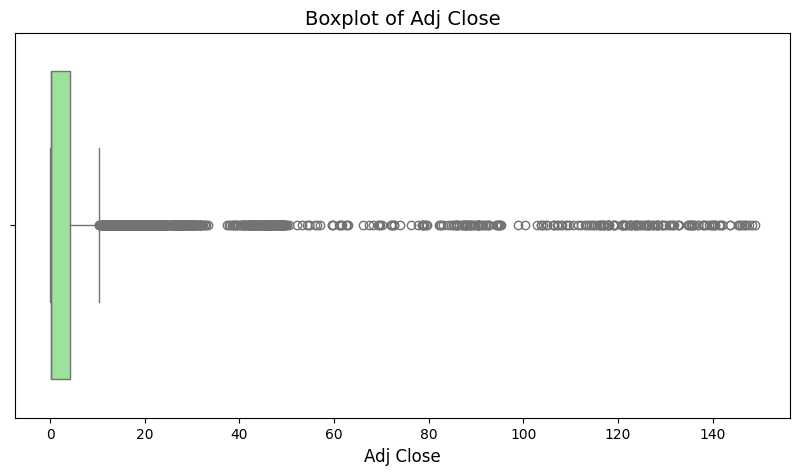

In [9]:
# Plot boxplot untuk atribut Volume
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Volume'], color='skyblue')
plt.title('Boxplot of Volume', fontsize=14)
plt.xlabel('Volume', fontsize=12)
plt.show()

# Plot boxplot untuk atribut Adj Close
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Adj Close'], color='lightgreen')
plt.title('Boxplot of Adj Close', fontsize=14)
plt.xlabel('Adj Close', fontsize=12)
plt.show()

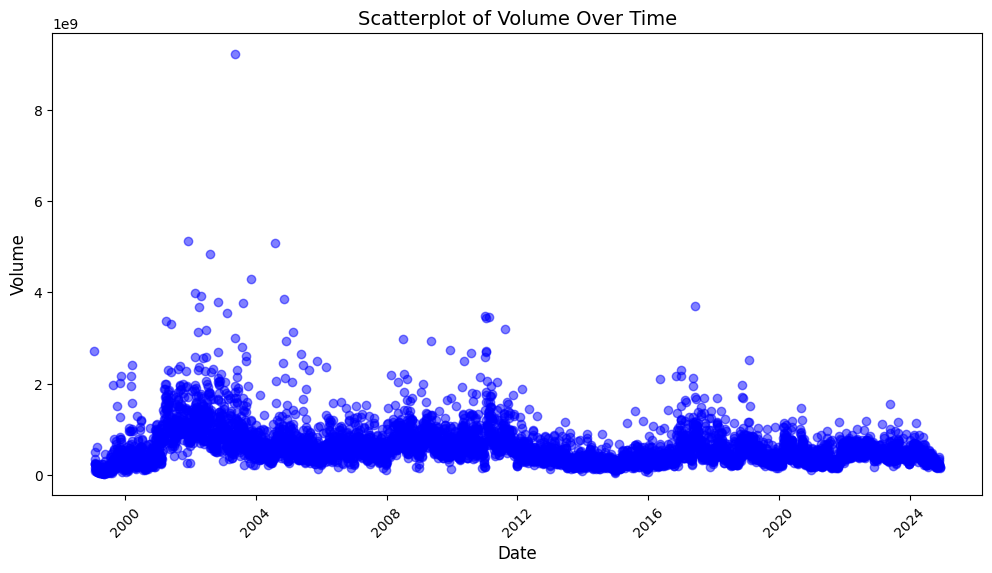

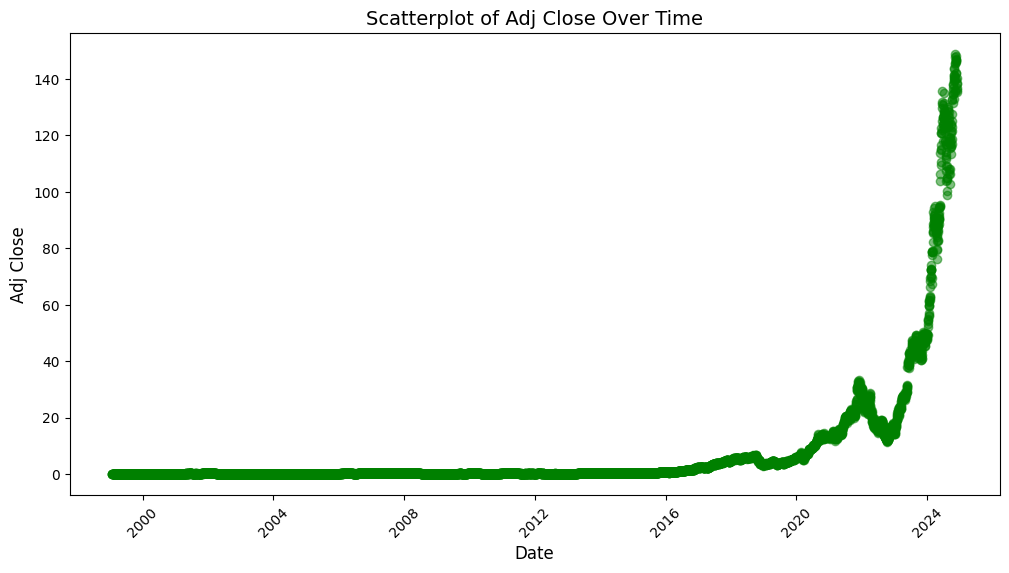

In [11]:
# Scatterplot untuk Volume
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['Volume'], alpha=0.5, color='blue')
plt.title('Scatterplot of Volume Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Scatterplot untuk Adj Close
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['Adj Close'], alpha=0.5, color='green')
plt.title('Scatterplot of Adj Close Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [7]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


# 1. Trend Analysis

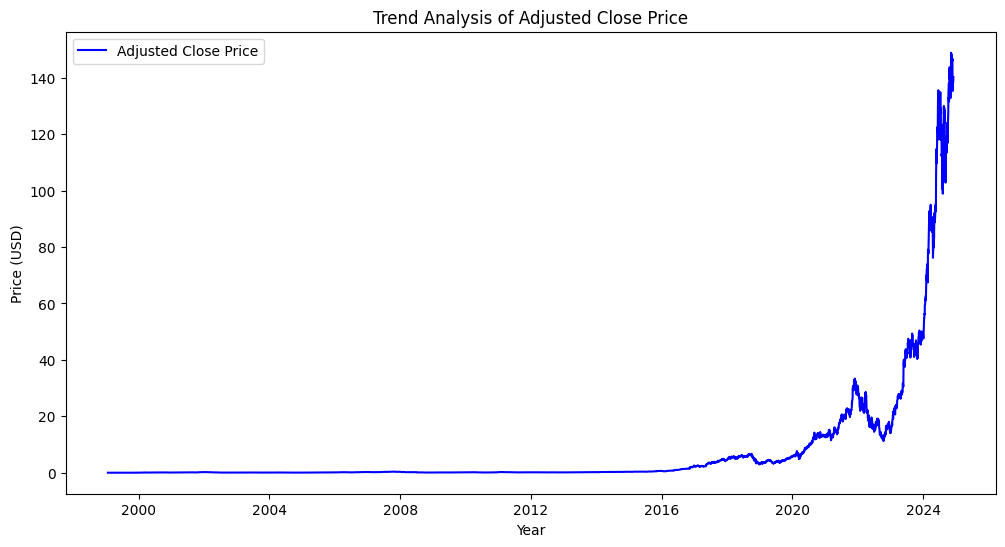

In [17]:
# Visualization of Price Trends

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(df['Adj Close'], label='Adjusted Close Price', color='blue')
plt.title('Trend Analysis of Adjusted Close Price')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

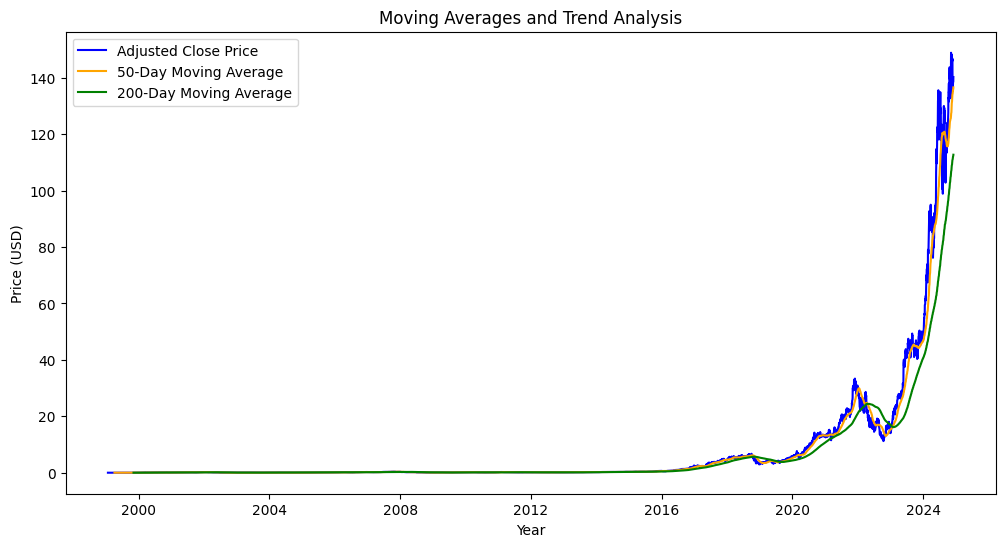

In [14]:
# Moving Averages

df['MA50'] = df['Adj Close'].rolling(window=50).mean()
df['MA200'] = df['Adj Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Adj Close'], label='Adjusted Close Price', color='blue')
plt.plot(df['MA50'], label='50-Day Moving Average', color='orange')
plt.plot(df['MA200'], label='200-Day Moving Average', color='green')
plt.title('Moving Averages and Trend Analysis')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

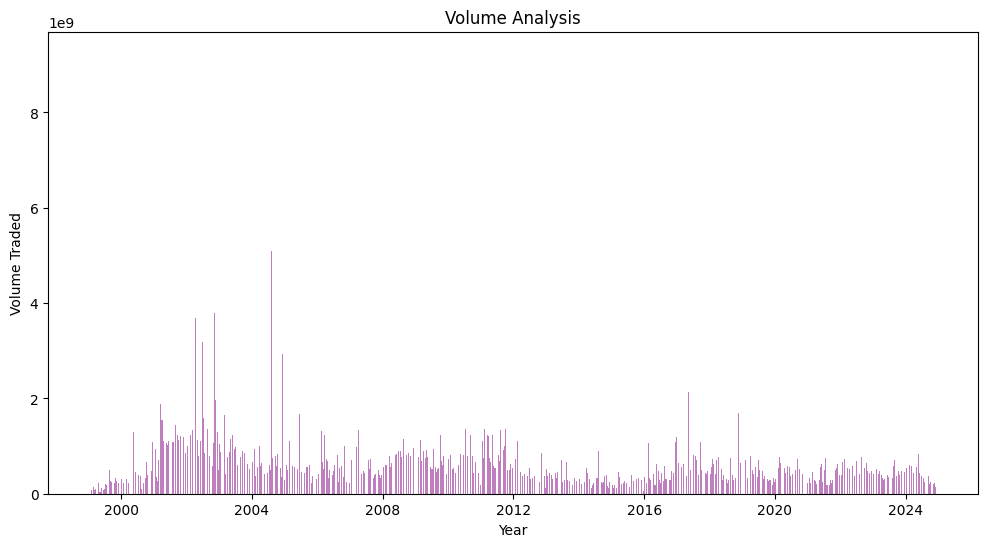

In [18]:
# Volume Analysis

plt.figure(figsize=(12, 6))
plt.bar(df.index, df['Volume'], color='purple', alpha=0.5)
plt.title('Volume Analysis')
plt.xlabel('Year')
plt.ylabel('Volume Traded')
plt.show()

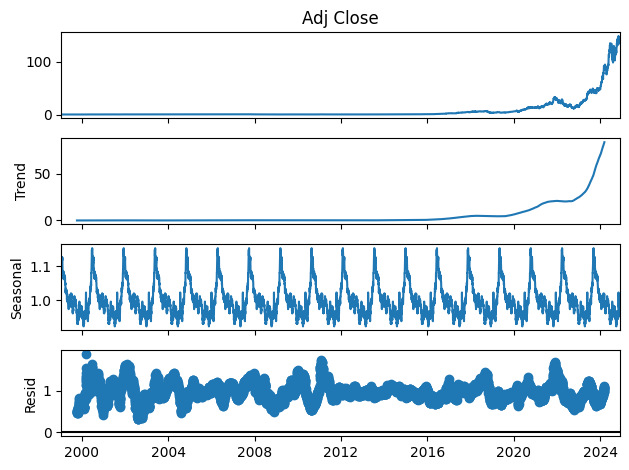

In [20]:
# Seasonal Decompotion

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Adj Close'], model='multiplicative', period=365)
result.plot()
plt.show()

# 2. Volatility Analysis

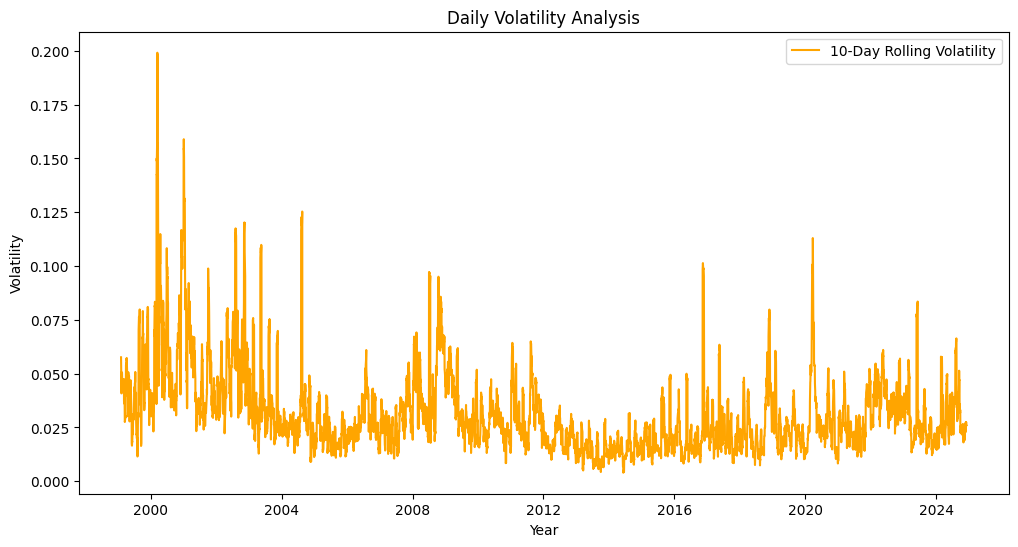

In [21]:
# Daily Volatility

# Percentage change
df['daily_return'] = df['Adj Close'].pct_change()

# Standard deviation of 10 days
df['daily_volatility'] = df['daily_return'].rolling(window=10).std()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['daily_volatility'], label='10-Day Rolling Volatility', color='orange')
plt.title('Daily Volatility Analysis')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [24]:
# Identify Days with High Volatility

high_volatility = df[df['daily_volatility'] > df['daily_volatility'].quantile(0.95)]
print("Days with high volatility:")
print(high_volatility[['Adj Close', 'daily_volatility']])

Days with high volatility:
            Adj Close  daily_volatility
Date                                   
1999-08-20   0.023650          0.070435
1999-08-23   0.022220          0.075818
1999-08-24   0.022110          0.076413
1999-08-25   0.021999          0.075177
1999-08-26   0.021670          0.074781
...               ...               ...
2023-06-02  39.327000          0.082527
2023-06-05  39.171001          0.082115
2023-06-06  38.653999          0.082577
2023-06-07  37.474998          0.083507
2023-06-08  38.509998          0.082932

[325 rows x 2 columns]


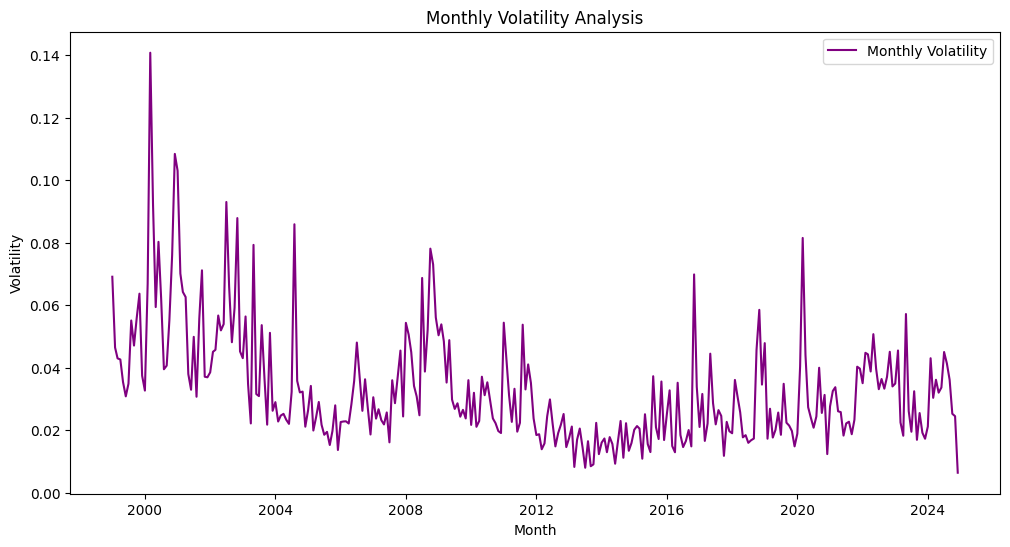

In [25]:
# Monthly Volatility

df['month'] = df.index.to_period('M')
monthly_volatility = df.groupby('month')['daily_return'].std()

plt.figure(figsize=(12, 6))
plt.plot(monthly_volatility.index.to_timestamp(), monthly_volatility, label='Monthly Volatility', color='purple')
plt.title('Monthly Volatility Analysis')
plt.xlabel('Month')
plt.ylabel('Volatility')
plt.legend()
plt.show()

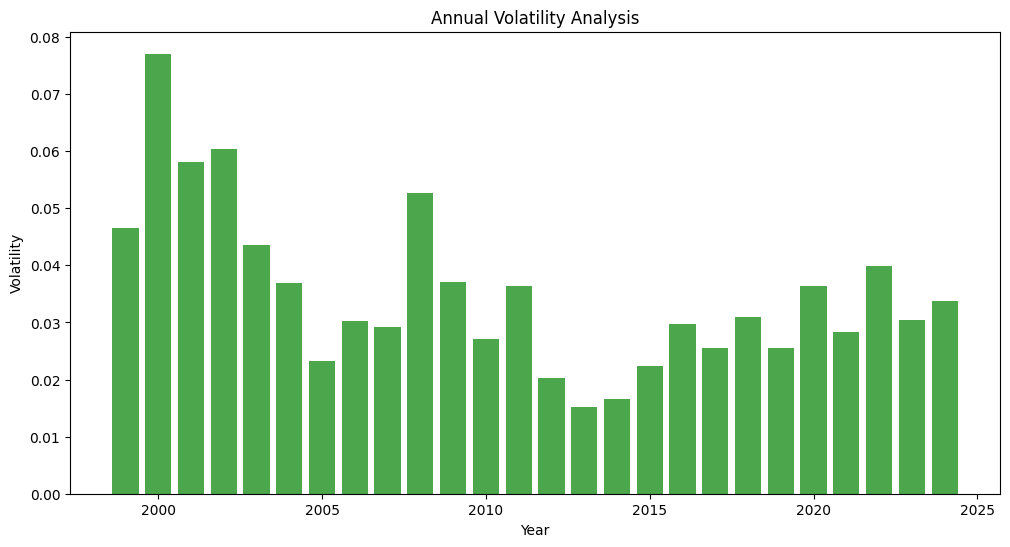

In [26]:
# Annual Volatility

annual_volatility = df.groupby(df.index.year)['daily_return'].std()

plt.figure(figsize=(12, 6))
plt.bar(annual_volatility.index, annual_volatility, color='green', alpha=0.7)
plt.title('Annual Volatility Analysis')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.show()

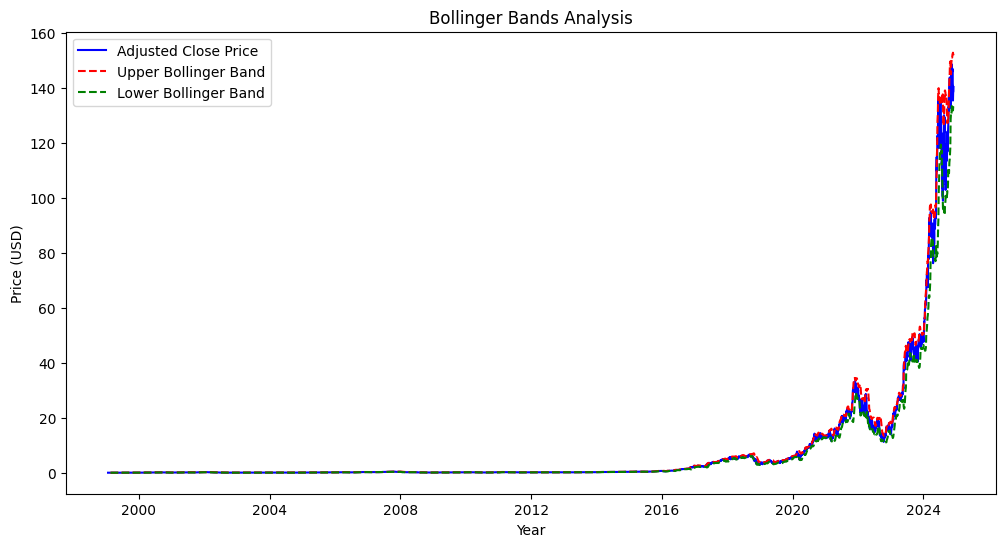

In [27]:
# Bollinger Bands (Measuring volatility based on moving averages)

df['MA20'] = df['Adj Close'].rolling(window=20).mean()
df['upper_band'] = df['MA20'] + 2 * df['Adj Close'].rolling(window=20).std()
df['lower_band'] = df['MA20'] - 2 * df['Adj Close'].rolling(window=20).std()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adjusted Close Price', color='blue')
plt.plot(df.index, df['upper_band'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(df.index, df['lower_band'], label='Lower Bollinger Band', color='green', linestyle='--')
plt.title('Bollinger Bands Analysis')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# 3. Price Change Analysis

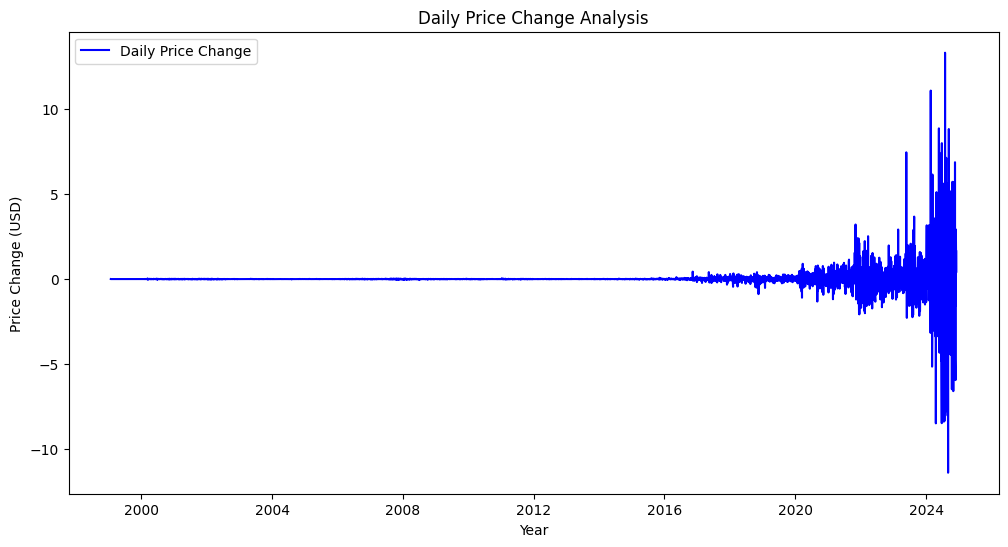

In [40]:
# Calculate daily price changes

df['price_change'] = df['Adj Close'].diff()

# Calculate price change in percentage
df['price_change_pct'] = df['adj_close'].pct_change() * 100


plt.figure(figsize=(12, 6))
plt.plot(df.index, df['price_change'], label='Daily Price Change', color='blue')
plt.title('Daily Price Change Analysis')
plt.xlabel('Year')
plt.ylabel('Price Change (USD)')
plt.legend()
plt.show()

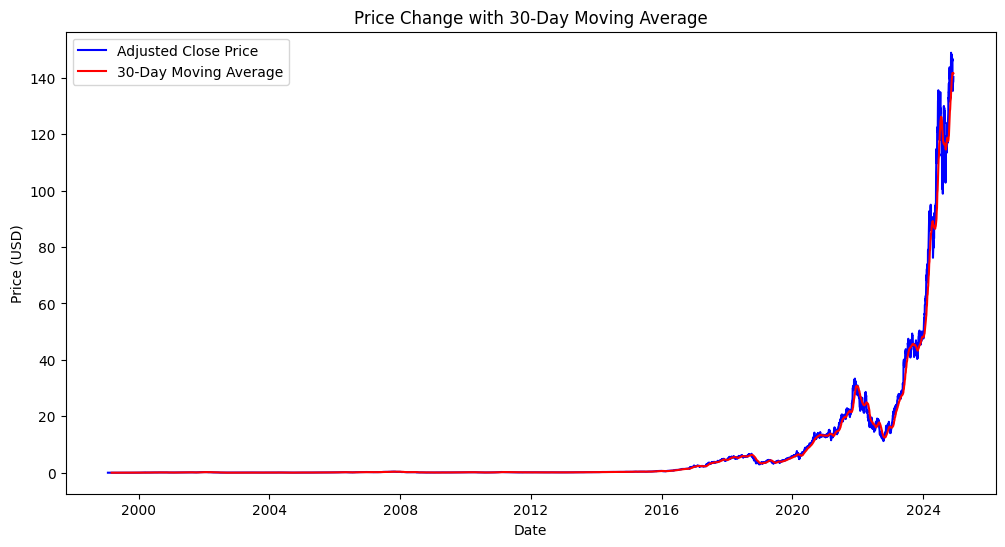

In [41]:
# 30-day moving average
df['30_day_avg'] = df['Adj Close'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adjusted Close Price', color='blue')
plt.plot(df.index, df['30_day_avg'], label='30-Day Moving Average', color='red')
plt.title('Price Change with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [42]:
# Identify the days with the biggest price changes
large_changes = df[df['price_change_pct'].abs() > df['price_change_pct'].abs().quantile(0.95)]
print(large_changes[['price_change_pct', 'Adj Close']])

            price_change_pct   Adj Close
Date                                    
1999-01-25         10.476382    0.019140
1999-01-26         -7.759334    0.017655
1999-02-02         -7.741855    0.015730
1999-02-11          8.590465    0.017380
1999-02-24          7.954975    0.020900
...                      ...         ...
2024-04-19        -10.004607   76.199997
2024-05-23          9.319649  103.799004
2024-07-31         12.812101  117.019997
2024-09-03         -9.525008  108.000000
2024-09-11          8.149866  116.910004

[326 rows x 2 columns]


# 4. Prediction and Forecasting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

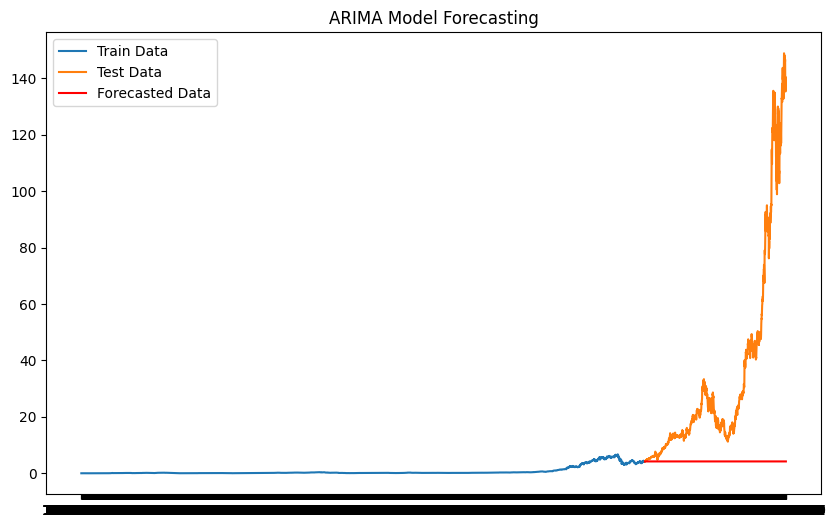

In [3]:
from statsmodels.tsa.arima.model import ARIMA


df = df.set_index('Date')
df = df[['Adj Close']]

# Perform differencin (create stationary data)
df['adj_close_diff'] = df['Adj Close'].diff()


train = df['Adj Close'][:int(0.8*len(df))]
test = df['Adj Close'][int(0.8*len(df)):]

# Train ARIMA models
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Do a Forecast
forecast = model_fit.forecast(steps=len(test))


plt.figure(figsize=(10,6))
plt.plot(train, label='Train Data')
plt.plot(test, label='Test Data')
plt.plot(test.index, forecast, label='Forecasted Data', color='red')
plt.legend()
plt.title('ARIMA Model Forecasting')
plt.show()

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and MSE for ARIMA (measure the level of accuracy of the model)
mae_arima = mean_absolute_error(test, forecast)
mse_arima = mean_squared_error(test, forecast)
rmse_arima = np.sqrt(mse_arima)

print(f"ARIMA MAE: {mae_arima}, MSE: {mse_arima}, RMSE: {rmse_arima}")

ARIMA MAE: 31.176515747706144, MSE: 2286.9630013721576, RMSE: 47.822201971178174


In [14]:
pip install prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmpr1sa4nwz/3h3129n_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr1sa4nwz/uh7abq2_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25928', 'data', 'file=/tmp/tmpr1sa4nwz/3h3129n_.json', 'init=/tmp/tmpr1sa4nwz/uh7abq2_.json', 'output', 'file=/tmp/tmpr1sa4nwz/prophet_modelr3gjtjtk/prophet_model-20241216075453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


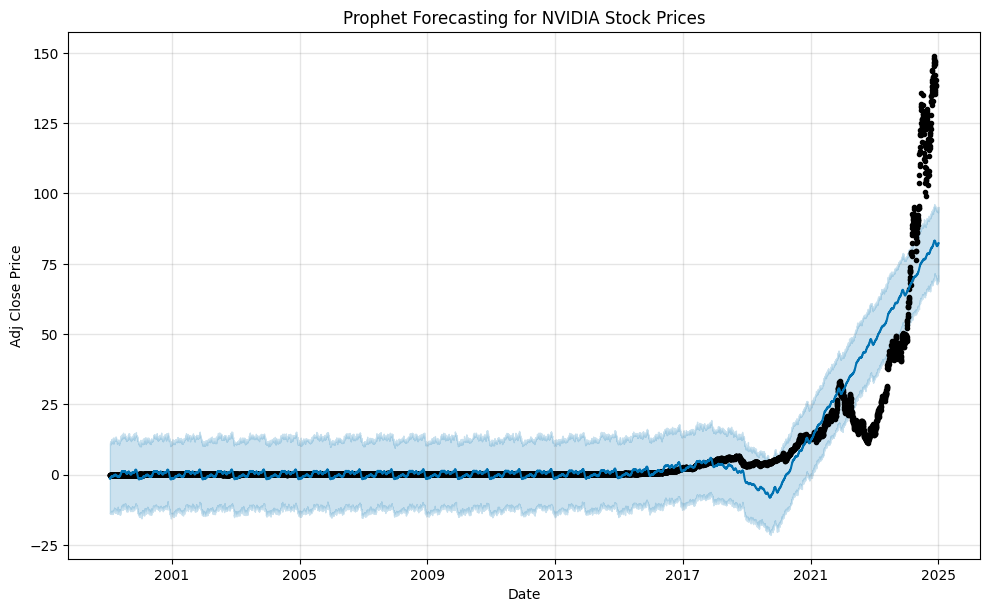

In [20]:
from prophet import Prophet


df_prophet = df[['Date', 'Adj Close']]
df_prophet.columns = ['ds', 'y']  # Rename columns for Prophet

# Train Prophet Models
model = Prophet(daily_seasonality=True)
model.fit(df_prophet)

# Create a dataframe for predictions for the next 30 days
future = model.make_future_dataframe(periods=30)

# Do a Forecast
forecast = model.predict(future)


model.plot(forecast)
plt.title('Prophet Forecasting for NVIDIA Stock Prices')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show()

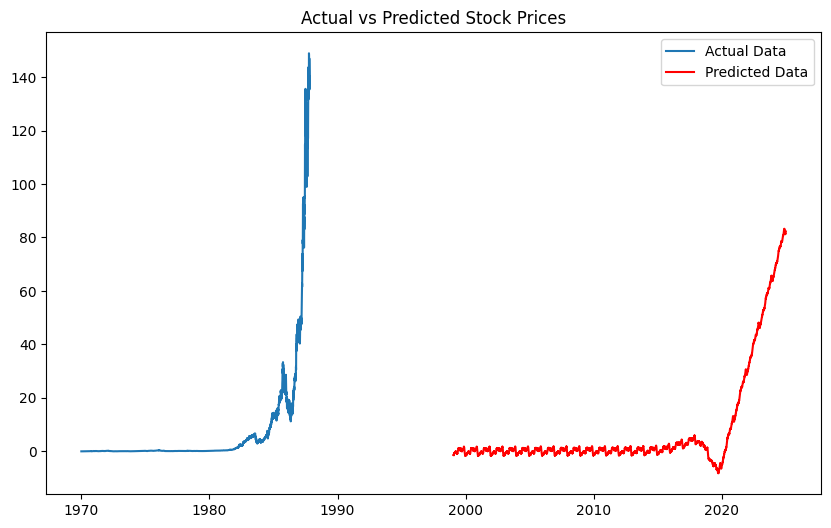

In [21]:
# Visualization actual result and prediction
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Adj Close'], label='Actual Data')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Data', color='red')
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.show()